# Face Emotion Recognition Project

### Importing the libraries

In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt 

# Preprocessing

A good data preprocessing in machine learning is the most important factor that can make a difference between a good model and a poor machine learning model.
There is a concept of Garbage In Garbage Out which means that faulty & poor quality of input, even to best of computing system will produce only a bad output.
On the other hand if before building model, the garbage data is properly preprocessed and converted to quality, clean data even the resulting machine learning model will be of great quality.

### Preprocessing the Training set

In [4]:
train_datagenerator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

training_data = train_datagenerator.flow_from_directory('./Data/train',
                                target_size = (64, 64),
                                batch_size = 32,
                                class_mode = 'categorical')

Found 28821 images belonging to 7 classes.


### Preprocessing the Test set

In [5]:
validation_datagenerator = ImageDataGenerator(rescale = 1./255)
validation_data = validation_datagenerator.flow_from_directory('./Data/test',
                                target_size = (64, 64),
                                batch_size = 32,
                                class_mode = 'categorical')

Found 7066 images belonging to 7 classes.


### Convolutional Neural Network (CNN)


There are three types of layers that make up the CNN which are the convolutional layers,  pooling layers, and fully-connected (FC) layers.The flatenning layer is used to flatten the input to a vector and output layer to show output. When these layers are stacked, a CNN architecture will be formed. In addition to these three layers, there are two more important parameters which are the dropout layer and the activation function

### Initialisation

In [6]:
model = tf.keras.models.Sequential()

### Convolution Layer


This layer is the first layer that is used to extract the various features from the input images. In this layer, the mathematical operation of convolution is performed between the input image and a filter of a particular size MxM. By sliding the filter over the input image, the dot product is taken between the filter and the parts of the input image with respect to the size of the filter (MxM).T

In [7]:
model.add(tf.keras.layers.Conv2D(filters = 32,
                                kernel_size = 3,
                                activation = 'relu',
                                input_shape = [64,64,3]))

### Pooling Layer


The primary aim of this layer is to decrease the size of the convolved feature map to reduce the  computational costs. This is performed by decreasing the connections between layers and independently operates on each feature map.

In [8]:
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

### Activation Functions



One of the most important parameters of the CNN model is the activation function. They are used to learn and approximate any kind of continuous and complex relationship between variables of the network. In simple words, it decides which information of the model should fire in the forward direction and which ones should not at the end of the network.

It adds non-linearity to the network. There are several commonly used activation functions such as the ReLU, Softmax, tanH and the Sigmoid functions. 

### Adding another convolutional layer

In [9]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides= 2 ))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

###  Flattening Layer


After the flattening step is that we end up with a long vector of input data that we then pass through the artificial neural network to have it processed further.What we have after we're done with each of the steps that: Input layer for the artificial neural network (flattening)

In [10]:
model.add(tf.keras.layers.Flatten())

###  Fully Connected Layer


The Fully Connected (FC) layer consists of the weights and biases along with the 
neurons and is used to connect the neurons between two different layers. These layers are usually placed before the output layer and form the last few layers of a CNN Architecture.

In this, the input image from the previous layers are flattened and fed to the FC layer. The flattened vector then undergoes few more FC layers where the mathematical functions operations usually take place. In this stage, the classification process begins to take place.

In [15]:
model.add(tf.keras.layers.Dense(units = 132, activation = 'relu'))

###  Output Layer


The Dense layers are the ones that are mostly used for the output layers. The activation used is the ‘Softmax’ which gives a probability for each class and they sum up totally to 1. The model will make it’s prediction based on the class with highest probability. 

In [12]:
model.add(tf.keras.layers.Dense(units = 7, activation = 'softmax'))

## Training the CNN

### Compiling the CNN

In [13]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Validation set

In [14]:
model = model.fit(x = training_data, validation_data = validation_data, epochs = 42)

Epoch 1/42
197/901 [=====>........................] - ETA: 9:21 - loss: 1.8092 - accuracy: 0.2565

KeyboardInterrupt: 

In [ ]:
def plot_model_history(model_history):
    
    #Plotting Accuracy and Loss curves 
    
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

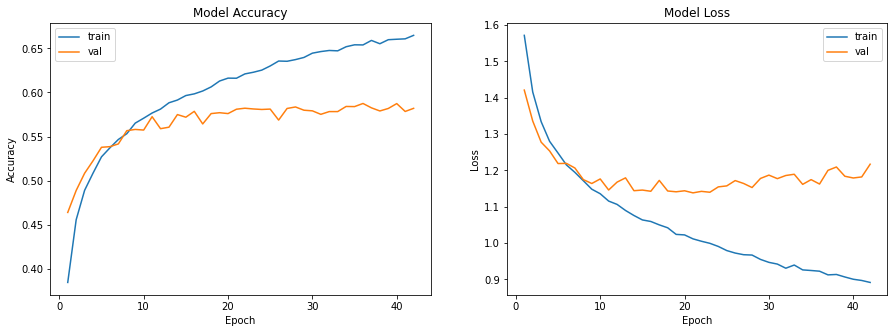

In [25]:
plot_model_history(model)

## Saving model

In [26]:
model.save('model.h5')

## Single Value prediction

In [27]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../input/happyman/82.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_data.class_indices
if result[0][0] == 1:
  prediction = '11'
elif result[0][1] == 2:
  prediction = '22'
elif result[0][2] == 3:
  prediction = '33'
elif result[0][3] == 4:
  prediction = '44'
elif result[0][4] == 5:
  prediction = '55'
elif result[0][5] == 6:
  prediction = '66'
else:
  prediction = '77'

In [28]:
print(result)

[[0. 0. 0. 1. 0. 0. 0.]]


In [29]:
max_value = max(result)

In [30]:
max_index_col = np.argmax(result, axis=1)

In [31]:
max_index_col

array([3])